In [1]:
#supervised ML
#classification --> Logistic Regression

# sigmoid Function
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#step 2: create the dataset
x = np.array(([1],[2],[3],[4],[5],[6]))   # studied hours
y = np.array(([0],[0],[0],[1],[1],[1]))   # passed or not

# step 3: create and train and model
model = LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [2]:
# predict_proba stands for predict probabilities
y_prob = model.predict_proba(x) [:,1]  # all row but from column 1
y_prob
#focus on right assumptions (actual probability for studied hours)

array([0.05723731, 0.15697456, 0.36349699, 0.63656293, 0.84305971,
       0.94277666])

In [3]:
# get the slope and intercept
a = model.coef_[0][0]   # slope (cerun)  ( why use double square,bcs coef_ is a 2D aaray in scikit-learn)
b = model.intercept_[0]   # intercept(pintasan)
print(f'a (Slope) :{a}')
print(f'b (Intercept) :{b}')

# 1.12 means the mode thinks 'hours_studied' strongly affects the chance of passing
# if we had a =0.2 the effact would be much weaker

# b= -3.9 means a student who studies very few hours a very low chance of passing.


a (Slope) :1.1206952510393666
b (Intercept) :-3.9223038967769632


In [4]:
# score = a*x + b

score = (1.1207)*(3.5)   #3.92245         # 3.5 just another data if the student study 3.5 hours a day
score = (3.92245)+(-3.9223)
score

0.0001500000000000945

In [5]:
# turn score into Sigmoid formula
# Euler number (e=2.718281828459045) this number cannot be change like pi
# probability = 1/ 1 + e ^ score

import math
res = math.e ** 0.00015
print(res)

1.0001500112505626


In [6]:
 1 / (1 + 1.00015)

 # 0.49 --> 49% probability
 #0.49 < 0.5 so means predict 'fail'
 # if 0.5> means predict 'yes'

0.49996250281228904

In [7]:
import pandas as pd

In [8]:
from google.colab import files
upload = files.upload()

Saving diabetes.csv to diabetes.csv


In [9]:
# load dataset
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Missing value calculation
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [12]:
# Check for duplicates
data.duplicated().sum()

np.int64(0)

In [13]:
# Select independent variable and dependent variable
# check dulu apa column yg ada
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
# Select independent variable and dependent variable
x = data.drop('Outcome', axis=1)    # independent v
y =data['Outcome']                  # dependent v   #we take the drop data as dv

In [15]:
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
# predict_probability
#predict_proba()  stand for predict probability

y_prob = model.predict_proba(x_test)[:,1]
y_prob

array([0.27587171, 0.18844086, 0.11448808, 0.16354446, 0.47152763,
       0.44181565, 0.01545949, 0.66077894, 0.54146137, 0.77733211,
       0.25591838, 0.89734144, 0.3362008 , 0.30303447, 0.08198096,
       0.38092464, 0.13935392, 0.07479528, 0.86674191, 0.56143057,
       0.20841338, 0.07739483, 0.53962428, 0.0945844 , 0.5394989 ,
       0.88554595, 0.12431327, 0.03016297, 0.25152958, 0.11581437,
       0.91112978, 0.87075938, 0.76536041, 0.83753319, 0.61668745,
       0.68328935, 0.96813003, 0.24363738, 0.51147551, 0.73613825,
       0.06983479, 0.59412645, 0.58366935, 0.32718599, 0.02759122,
       0.50239275, 0.6393479 , 0.22533799, 0.36056256, 0.95629563,
       0.04889599, 0.66096112, 0.8116769 , 0.24552928, 0.09325806,
       0.04152087, 0.7781665 , 0.0057039 , 0.40861817, 0.75696165,
       0.74134846, 0.35194245, 0.19236789, 0.20492144, 0.07688254,
       0.62716494, 0.0509161 , 0.7328617 , 0.03691982, 0.71593403,
       0.67523613, 0.07016495, 0.18115143, 0.11430304, 0.09115

In [18]:
# get the predicted values
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [19]:
data= pd.DataFrame({'Proba':y_prob, 'Predicted':y_pred})
data.head(10)

,Proba,Predicted
0,0.275872,0
1,0.188441,0
2,0.114488,0
3,0.163544,0
4,0.471528,0
5,0.441816,0
6,0.015459,0
7,0.660779,1
8,0.541461,1
9,0.777332,1


In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm
cm_data= pd.DataFrame(cm, columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])
cm_data

#                            Actual_Positive     Actually_Negative
#    Predicted_Positive            78 TP               21 FP
#    Predicted_Negative            18 FN               37 TN
 #                                                  Total No. of Observation =154     115 correct 39 wrong

,Predicted Positive,Predicted Negative
Actual Positive,78,21
Actual Negative,18,37


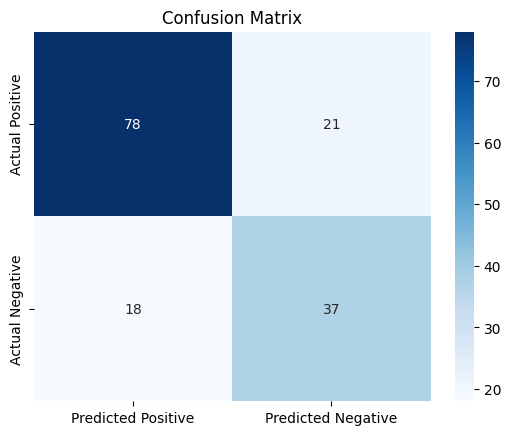

In [21]:
import seaborn as sb
import matplotlib.pyplot as mb
sb.heatmap(cm_data, annot=True, fmt='d', cmap='Blues')
mb.title('Confusion Matrix')
mb.show()

In [22]:
print('\t Classification Report \n')
print(classification_report(y_test, y_pred))
#0 - positif
#1 - negatif

	 Classification Report 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

